<a href="https://colab.research.google.com/github/ErikaNigrinis/TalentoTech/blob/main/Copia_de_Data_Analysis_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCCIÓN

Usaré esta notebook para proporcionar una introducción a SQL, lenguaje imprescindible para todo analista de datos.

Los sistemas gestores de bases de datos interpretan consultas escritas en lenguaje SQL, y así es como interactuamos y obtenemos datos de las bases de datos y aplicaciones.

* SQL significa Structured Query Language (Lenguaje de consulta estructurado)
* SQL permite acceder y manipular bases de datos
* SQL es una herramienta simple para el análisis avanzado de datos

SQL no se usa sólo para manipular datos, sino también para administrar la misma base de datos, crear y modificar el diseño de objetos de la base de datos, como tablas. El elemento de SQL que se usa para crear y modificar objetos de base de datos se denomina lenguaje de definición de datos (DDL). Este curso no trata DDL.

En esta notebook veremos cómo trabajar/manipular tablas. Aprenderemos a usar SQL para interactuar con una base de datos de fútbol europeo y generar información interesante con sus datos.

La base de datos utilizada, pueder ser encontrada [aquí](https://www.kaggle.com/hugomathien/soccer)

## 1.1 Definiciones importantes

Aunque SQL es un estándar ANSI/ISO, existen diferentes versiones del lenguaje SQL.
Sin embargo, para cumplir con el estándar del American National Standards Institute (ANSI), todas las versiones deben soportar al menos los comandos principales (como `SELECT`, `UPDATE`, `DELETE`, `INSERT`, `WHERE`) de forma similar.

En este caso, vamos a trabajar con SQLite que es una implementación específica. La mayoría de los lenguajes SQL comparten todas las capacidades de este notebook. Las diferencias suelen estar en el rendimiento y en las funcionalidades analíticas avanzadas (y a veces en los errores, por supuesto).

## 1.2 ¿Qué es SQLite?
SQLite es una biblioteca de software que proporciona un sistema de gestión de bases de datos relacionales que se puede utilizar en casi todos los lenguajes de programación, incluido Python.

El lite en SQLite significa facilidad en términos de configuración, administración de la base de datos y recursos necesarios. Las siguientes son sus características más importantes: es autónomo, sin servidor y transaccional.

Más información acerca de SQLite:
[https://www.sqlitetutorial.net/](https://www.sqlitetutorial.net/what-is-sqlite/)



### 1.2.1 Configuraciones previas

SQLite se puede utilizar en casi todos los lenguajes de programación, incluido Python. Esta notebook corre en Python, por lo que vamos a importar la librería de SQLite y otras que nos pueden ser de utilidad más adelante.

Asimismo, crearemos la conexión con la BD y listaremos las tablas con las que contamos.

Ejecuta (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Importación de librerías

import pandas as pd # libreria de python para manipulacion de datos
import sqlite3 # SQLite
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# Los datos de entrada están disponibles en el directorio "../input/".

database = ('/content/drive/MyDrive/Colab Notebooks/TALENTO TECH/Copia de Copia de database.sqlite')

# Creamos la conexión con la BD y listaremos las tablas con las que contamos

conn = sqlite3.connect(database)
print ("Conexión exitosa")

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

Conexión exitosa


,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


# 2. Sentencia SELECT

Esta es la consulta más básica y su estructura es muy simple:
* Se define lo que se quiere ver después del `SELECT`
* Se eligen las tablas a consultar después del `FROM`

Las únicas partes imprescindibles de una consulta son el `SELECT` y el `FROM`.

La sintaxis de esta consulta es así:

`SELECT column1, column2, ...`

`FROM table_name;`


Para consultar por todos los campos en una tabla sin tener que escribir uno por uno el nombre de cada campo, se utiliza `SELECT *`


`SELECT *` significa que quieres obtener todas las columnas posibles de la tabla consultada. Los datos devueltos se almacenan en una tabla de resultados, denominada conjunto de resultados.

La sintaxis de esta consulta es así:

`SELECT *`

`FROM table_name;`

Es una buena práctica terminar la consulta con un punto y coma para indicar que la consulta está completa. Las palabras clave se escriben en mayúsculas y los nombres de tablas y campos se escriben en minúsculas.

## 2.1.1 Ejemplo: Listar los países

Queremos consultar qué países se encuentran en la tabla `Country` de la base de datos del fútbol europeo.


Importante: La estructura y el orden de las secciones son importantes, mientras que los espacios, las nuevas líneas, las mayúsculas y las sangrías están ahí para facilitar la lectura del código.

Ejecuta (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
query = """SELECT *
            FROM Country; """

countries = pd.read_sql(query, conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


## 2.1.2 Práctica: Listar las ligas del fútbol europeo

Deben listar todas las ligas que estén en la tabla `League` de la base de datos de fútbol europeo.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""`  justo después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten haciendo clic en ejecutar (o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" justo después de la palabra query =

query = """ SELECT id, player_name, birthday, height, weight
            FROM Player;
            """

#No modificar lo siguiente:
leagues = pd.read_sql(query, conn)
leagues

,id,player_name,birthday,height,weight
0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
2,3,Aaron Doran,1991-05-13 00:00:00,170.18,163
3,4,Aaron Galindo,1982-05-08 00:00:00,182.88,198
4,5,Aaron Hughes,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...
11055,11071,Zoumana Camara,1979-04-03 00:00:00,182.88,168
11056,11072,Zsolt Laczko,1986-12-18 00:00:00,182.88,176
11057,11073,Zsolt Low,1979-04-29 00:00:00,180.34,154
11058,11074,Zurab Khizanishvili,1981-10-06 00:00:00,185.42,172


## 2.1.3 Práctica: Listar los jugadores del fútbol europeo

Deben listar los campos `id`,`player_name`, `birthday`, `height` y `weight` que estan en la tabla `Player` de la base de datos de Fútbol Europeo.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query =

#No modificar lo siguiente:
players = pd.read_sql(query, conn)
players

## 2.2 Sentencia SELECT DISTINCT

La sentencia `SELECT DISTINCT` se utiliza para devolver sólo valores distintos (diferentes).

Dentro de una tabla, una columna a menudo contiene muchos valores duplicados y a veces sólo se desea listar los diferentes valores (distintos).

La sintaxis de `SELECT DISTINCT` es así:

`SELECT DISTINCT column1`

`FROM table_name;`

## 2.2.1 Ejemplo: Listar las temporadas jugadas de esta Base de Datos

Si consultamos por todas las temporadas que se almacenaron en la tabla `Match`de la base de datos de Fútbol Europeo, vamos a tener el siguiente resultado.

Ejecuta (haciendo clic en ejecutar o Shift+Enter) el códido de abajo


In [ ]:
query = """
SELECT season
FROM Match;
"""
seasons = pd.read_sql(query, conn)
seasons

,season
0,2008/2009
1,2008/2009
2,2008/2009
3,2008/2009
4,2008/2009
...,...
25974,2015/2016
25975,2015/2016
25976,2015/2016
25977,2015/2016


Con el resultado anterior, es muy difícil responder a la pregunta ¿Cuáles son las temporadas almacenadas en esta base de datos?
Para responderla sin mucho esfuerzo, usamos `SELECT DISTINCT` para consultar la tabla `Match` de la base de datos.

Ejecuta (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
query = """
SELECT DISTINCT season
FROM Match;
"""
seasons = pd.read_sql(query, conn)
seasons

,season
0,2008/2009
1,2009/2010
2,2010/2011
3,2011/2012
4,2012/2013
5,2013/2014
6,2014/2015
7,2015/2016


## 2.2.2 Práctica: Listar sólo tasas diferentes de valoración general de los jugadores.

En la tabla `Player_Attributes` de la base de datos de Fútbol Europeo hay el campo `overall_rating` que parece contener la valoración de los jugadores. El objetivo es ver sólo tasas diferentes de valoración general de los jugadores.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query = """
        SELECT DISTINCT overall_rating
        FROM Player_Attributes;
        """

#No modificar lo siguiente:
overall_rating = pd.read_sql(query, conn)
overall_rating

,overall_rating
0,67.0
1,62.0
2,61.0
3,74.0
4,73.0
...,...
57,33.0
58,36.0
59,37.0
60,35.0


# 3. Sentencia LIMIT

Cuando deseamos poner un límite al resultado o no nos interesa conocer la totalidad de los resultados, podemos **limitar** la cantidad de registros resultantes mediante la sentencia `LIMIT`

La sintaxis de `LIMIT` es así:

`SELECT column1, column2...`

`FROM table_name`

`LIMIT number;`

## 3.1.1 Ejemplo: Listar 15 jugadores de la base de datos del fútbol europeo

Queremos listar 15 jugadores de la tabla `Player` de la base de datos de Fútbol Europeo. En la tabla de resultados quiero ver los campos `ìd`,`player_name`, `birthday`, `height` y `weight`. Todos se encuentran en la tabla `Player`

Ejecuta (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
query = """
SELECT id, player_name, birthday, height, weight
FROM Player
LIMIT 15;
"""
players = pd.read_sql(query, conn)
players

## 3.1.2 Práctica: Listar 25 equipos del fútbol europeo

Deben listar 25 equipos del fútbol europeo. La tabla de resultados deberá contener los campos `id` y `team_long_name` de la tabla `Team` de la base de datos de Fútbol Europeo.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query = """
SELECT id, team_long_name
FROM Team
LIMIT 15;
      """

#No modificar lo siguiente:
teams = pd.read_sql(query, conn)
teams

,id,team_long_name
0,1,KRC Genk
1,2,Beerschot AC
2,3,SV Zulte-Waregem
3,4,Sporting Lokeren
4,5,KSV Cercle Brugge
5,6,RSC Anderlecht
6,7,KAA Gent
7,8,RAEC Mons
8,9,FCV Dender EH
9,10,Standard de Liège


# 4. Funciones agregativas/ Métricas

Todas las métricas tienen que ser agregadas usando funciones. Las funciones agregativas más comunes son:

* `SUM()` | Sumatoria total de una columna tipo numérica.
* `COUNT()` | Devuelve la cantidad de filas.
* `COUNT(DISTINCT)` | Devuelve la cantidad de filas distintas o diferentes.
* `AVG()` | Promedia los valores de una columna tipo numérica.
* `MIN()` | Menor valor dentro de la columna especificada.
* `MAX()` | Mayor valor dentro de la columna especificada.

La sintaxis de las métricas en la sentencia `SELECT` es así:
* `SUM()`

`SELECT SUM(column1), column2...`

`FROM table_name`

* `COUNT()`

`SELECT COUNT(column1), column2...`

`FROM table_name`

* `COUNT(DISTINCT)`

`SELECT COUNT(DISTINCT column1), column2...`

`FROM table_name`

* `AVG()`

`SELECT AVG(column1), column2...`

`FROM table_name`


* `MIN()`

`SELECT MIN(column1), column2...`

`FROM table_name`


* `MAX()`

`SELECT MAX(column1), column2...`

`FROM table_name`


## 4.1.1 Ejemplo: ¿Cuántos países diferentes están almacenados en la tabla Country?

Para consultar por el número de países diferentes almacenados en la tabla `Country` y que la tabla de resultados nos muestre únicamente el número con la cantidad de países, necesitamos usar una función agregativa que cuente el número de registros pero además, que cuente sólo los registros distintos. Esa función es `COUNT(DISTINCT )`

Ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query = """
SELECT COUNT(DISTINCT name)
FROM Country;
"""

#No modificar lo siguiente:
count_countries = pd.read_sql(query, conn)
count_countries

,COUNT(DISTINCT name)
0,11


## 4.1.2 Práctica: Traer el número de etapas jugadas de la tabla Match

Deben traer el número de etapas `stage` almacenados en la tabla `Match` de la base de datos de Fútbol Europeo. La tabla de resultados deberá mostrar únicamente el número con la cantidad de etapas **diferentes**.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query = """

SELECT COUNT(DISTINCT stage)
FROM Match;

"""

#No modificar lo siguiente:
countdis_stages = pd.read_sql(query, conn)
countdis_stages

,COUNT(DISTINCT stage)
0,38


## 4.1.3 Práctica: Traer la suma de goles hechos por los equipos visitantes de la tabla Match

Deben traer la suma de goles hechos por los equipos visitantes `away_team_goal` almacenados en la tabla `Match` de la base de datos de Fútbol Europeo. La tabla de resultados deberá mostrar únicamente el número con la suma de goles.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query = """

SELECT SUM(away_team_goal)
FROM Match;

"""

#No modificar lo siguiente:
sum_awayteam = pd.read_sql(query, conn)
sum_awayteam

,SUM(away_team_goal)
0,30160


## 4.1.4 Práctica: Traer el promedio de goles hechos por los equipos locales y el promedio de goles hechos por los visitantes de la tabla Match

Deben traer el promedio de goles hechos por los equipos locales `home_team_goal` y el promedio de goles hechos por los equipos visitantes `away_team_goal` almacenados en la tabla `Match` de la base de datos de Fútbol Europeo. La tabla de resultados deberá mostrar únicamente el número con el promedio de goles.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query = """

SELECT AVG(home_team_goal), AVG(away_team_goal)
FROM Match;

"""

#No modificar lo siguiente:
avg_teamgoals = pd.read_sql(query, conn)
avg_teamgoals

,AVG(home_team_goal),AVG(away_team_goal)
0,1.544594,1.160938


## 4.1.5 Práctica: Traer la máxima cantidad de goles que un equipo visitante anotó en los juegos de la tabla Match

Deben traer la máxima cantidad de goles un equipo visitante `away_team_goal` almacenados en la tabla `Match` de la base de datos de Fútbol Europeo. La tabla de resultados deberá mostrar únicamente el número con cantidad de goles.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query = """SELECT MAX (away_team_goal)
        FROM Match;"""

#No modificar lo siguiente:
max_teamgoals = pd.read_sql(query, conn)
max_teamgoals

,MAX (away_team_goal)
0,9


# 5. Operaciones matemáticas

Se pueden realizar operaciones matemáticas como: `+`, `-`, `*`, `/`, etc. Asimismo, estás operaciones pueden ser usadas en conjunto con las funciones agregativas/ métricas.  

La sintaxis en la sentencia `SELECT` es así:

* `+`

`SELECT column1+column2`

`FROM table_name`

La sintaxis combinando con una métrica en la sentencia `SELECT` es así:

* `AVG(+)`

`SELECT AVG(column1+column2)`

`FROM table_name`


## 5.1.1 Práctica: Traer el promedio de goles por partido de la tabla Match

Deben traer el promedio de la suma de goles hechos por los equipos locales `home_team_goal` y visitantes `away_team_goal` en todos los juegos almacenados en la tabla `Match` de la base de datos de Fútbol Europeo. La tabla de resultados deberá mostrar únicamente el número con el promedio de goles por partido.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query = """SELECT AVG(home_team_goal+away_team_goal)
        FROM Match;"""

#No modificar lo siguiente:
avg_sum_goals = pd.read_sql(query, conn)
avg_sum_goals

,AVG(home_team_goal+away_team_goal)
0,2.705531


# 6. Sentencia WHERE

La sentencia `WHERE` se utiliza para filtrar registros. Mediante esta sentencia, se extraen sólo aquellos registros que cumplen una condición específica.

La sintaxis de `WHERE` es así:

`SELECT column1, column2...`

`FROM table_name`

`WHERE condition;`


## 6.1 Campos de texto (y fecha) vs  campos numéricos

SQL requiere comillas simples alrededor de los valores del texto y fecha (la mayoría de los sistemas de bases de datos también permiten comillas dobles). Sin embargo, los campos numéricos no deben incluirse entre comillas.

Ejemplos de sintaxis con campo númerico:

`SELECT *`

`FROM Customers`

`WHERE CustomerId = 1;`

Ejemplos de sintaxis con campo de texto:

`SELECT *`

`FROM Customers`

`WHERE Country = 'Mexico';`


## 6.2.1 Ejemplo: Listar los jugadores que pesan 165 libras

Queremos listar a los jugadores que cumplan con la condición de pesar 165 libras. En la tabla de resultados quiero ver los campos `id`,`player_name`, `birthday`, `height` y `weight` de los que cumplen la condición. Todos se encuentran en la tabla `Player`

Ejecuta (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
query = """SELECT id, player_name, birthday, height, weight
        FROM Player
        WHERE weight = 165
        LIMIT 15;"""

players_weight = pd.read_sql(query, conn)
players_weight

,id,player_name,birthday,height,weight
0,27,Abdelmalek Cherrad,1981-01-14 00:00:00,185.42,165
1,44,Abdoulaye Doucoure,1993-01-01 00:00:00,182.88,165
2,46,Abdoulaye Keita,1994-01-05 00:00:00,175.26,165
3,49,Abdoulwahid Sissoko,1990-03-20 00:00:00,182.88,165
4,58,Abdullah Al Hafith,1992-12-25 00:00:00,187.96,165
5,62,Abel Gomez,1982-02-20 00:00:00,182.88,165
6,67,Abel,1978-12-22 00:00:00,177.80,165
7,69,Abiola Dauda,1988-02-03 00:00:00,180.34,165
8,78,Abraham Paz Cruz,1979-03-14 00:00:00,177.80,165
9,84,Aco Stojkov,1983-04-29 00:00:00,177.80,165


## 6.2.2 Práctica: Listar las temporadas en que un equipo visitante anotó 7 o más goles

Deben listar las temporadas en que algún equipo visitante haya anotado 7 o más goles. La tabla de resultados deberá contener los campos `season`, `home_team_goal`, `away_team_goal` de la tabla `Match` de la base de datos de Fútbol Europeo.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query = """SELECT season, home_team_goal, away_team_goal
        FROM Match
        WHERE away_team_goal >= 7;"""

#No modificar lo siguiente:
away_team_goals = pd.read_sql(query, conn)
away_team_goals

,season,home_team_goal,away_team_goal
0,2012/2013,1,7
1,2014/2015,1,7
2,2014/2015,2,7
3,2015/2016,0,9
4,2010/2011,1,8
5,2013/2014,0,7
6,2010/2011,0,7
7,2013/2014,0,7
8,2010/2011,0,8
9,2011/2012,0,7


## 6.3 Operadores lógicos en WHERE

La sentencia WHERE puede combinarse con los operadores lógicos: `AND`, `OR` y `NOT`. Los operadores `AND` y `OR` se utilizan para filtrar registros basados en más de una condición.
* El operador `AND` muestra un registro si todas las condiciones separadas por `AND` son VERDADERA(s).
* El operador `OR` muestra un registro si alguna de las condiciones separadas por `OR` es VERDADERA(s).
* El operador `NOT` muestra un registro si la(s) condición(es) NO es VERDADERA(s).


1. Sintaxis de`AND`:

`SELECT column1, column2, ...`

`FROM table_name`

`WHERE condition1 AND condition2 AND condition3 ...;`


2. Sintaxis de `OR`

`SELECT column1, column2, ...`

`FROM table_name`

`WHERE condition1 OR condition2 ...;`

3. Sintaxis de `NOT`

`SELECT column1, column2, ...`

`FROM table_name`

`WHERE NOT condition;`

## 6.3.1 Práctica: Traer el Id de los equipos que desarrollan un dribbling normal y su velocidad de juego es balanceada

Tomando la tabla `Team_Attributes` de la base de datos de Fútbol Europeo, deben obtener el `id`,`buildUpPlayDribblingClass` y `buildUpPlaySpeedClass`  de los equipos que tengan los siguientes atributos:
* `buildUpPlayDribblingClass = 'Normal'`
* `buildUpPlaySpeedClass = 'Balanced'`

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query = """SELECT id, buildUpPlayDribblingClass, buildUpPlaySpeedClass
        FROM Team_Attributes
        WHERE buildUpPlayDribblingClass = 'Normal' AND buildUpPlaySpeedClass = 'Balanced';"""

#No modificar lo siguiente:
team_att_and = pd.read_sql(query, conn)
team_att_and

,id,buildUpPlayDribblingClass,buildUpPlaySpeedClass
0,2,Normal,Balanced
1,3,Normal,Balanced
2,8,Normal,Balanced
3,9,Normal,Balanced
4,14,Normal,Balanced
...,...,...,...
382,1450,Normal,Balanced
383,1451,Normal,Balanced
384,1452,Normal,Balanced
385,1457,Normal,Balanced


## 6.3.2 Práctica: Traer el Id de los equipos que desarrollan un juego de pase largo o su velocidad de juego es rápida

Tomando la tabla `Team_Attributes` de la base de datos de Fútbol Europeo, deben obtener el `id`,`buildUpPlayPassingClass` y `buildUpPlaySpeedClass`  de los equipos que tengan los siguientes atributos:
* `buildUpPlayPassingClass = 'Long'`
* `buildUpPlaySpeedClass = 'Fast'`

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query = """SELECT id, buildUpPlayPassingClass, buildUpPlaySpeedClass
        FROM Team_Attributes
        WHERE buildUpPlayPassingClass = 'Long' OR buildUpPlaySpeedClass = 'Fast';"""

#No modificar lo siguiente:
team_att_or = pd.read_sql(query, conn)
team_att_or

,id,buildUpPlayPassingClass,buildUpPlaySpeedClass
0,4,Long,Fast
1,42,Long,Balanced
2,69,Mixed,Fast
3,72,Mixed,Fast
4,77,Mixed,Fast
...,...,...,...
226,1420,Mixed,Fast
227,1421,Long,Fast
228,1423,Long,Fast
229,1436,Long,Balanced


## 6.3.3 Práctica: Traer la tabla de países sin Bélgica

Deben filtrar la tabla de países y traerla sin `Belgium`. La tabla de resultados deberá contener los campos `id` y `name` de la tabla `Country` de la base de datos de Fútbol Europeo.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query = """SELECT id, name
        FROM Country
        WHERE name != 'Belgium';"""

#No modificar lo siguiente:
countries_not = pd.read_sql(query, conn)
countries_not

,id,name
0,1729,England
1,4769,France
2,7809,Germany
3,10257,Italy
4,13274,Netherlands
5,15722,Poland
6,17642,Portugal
7,19694,Scotland
8,21518,Spain
9,24558,Switzerland


## 6.4 Otros operadores que trabajan con la sentencia WHERE

Los siguientes operadores también pueden ser utilizados en la sentencia WHERE:

* | `=`       | Igual

* | `>`       | Mayor que

* | `<`       | Menor que

* | `>=`      | Mayor o igual que  

* | `<=`      | Menor o igual que

* | `<>`      | No igual. *Nota: En algunas versiones de SQL este operador puede ser escrito como !=*

* | `BETWEEN` | Entre cierto rango

* | `LIKE`    | Para consultar los datos basados en información parcial, se utiliza el operador `LIKE` en la sentencia `WHERE`. Busca un patrón. El patrón va antes, después o entre un par de % (wildcard). Ejemplo: `LIKE 's%'` busca cualquier texto que comience con 's'. `LIKE '%er'` busca cualquier texto que termine con 'er'. Y `LIKE '%per%'` busca cualquier texto que contenga 'per'.

* | `IN`      | Para especificar varios valores posibles para una columna o subquery. Ejemplo de sintaxis cuando se especifica varios valores:

`SELECT column1
FROM Table_name
WHERE column1 IN (value1, value2);`.

Ejemplo se sintaxis cuando se usa `IN` en una subquery:

`SELECT TrackId, Name, AlbumId
FROM Tracks
WHERE AlbumId IN
    (SELECT	AlbumId
    FROM Albums
    WHERE ArtistId = 12);`.

## 6.4.1 Práctica: Traer la tabla de países únicamente con Italia

Deben filtrar la tabla de países y traer únicamente a `Italy`. La tabla de resultados deberá contener los campos `id` y `name` de la tabla `Country` de la base de datos de Fútbol Europeo.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo


In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query = """SELECT id, name
        FROM Country
        WHERE name = 'Italy';"""

#No modificar lo siguiente:
countries_equal = pd.read_sql(query, conn)
countries_equal

,id,name
0,10257,Italy


## 6.4.2 Práctica: Traer la tabla de países sin Polonia

Deben traer la tabla de países sin `Poland`. La tabla de resultados deberá contener los campos `id` y `name` de la tabla `Country` de la base de datos de Fútbol Europeo. **No se debe utilizar `NOT`**.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo



In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query ="""SELECT id, name
        FROM Country
        WHERE name <> 'Poland';"""

#No modificar lo siguiente:
countries_dif = pd.read_sql(query, conn)
countries_dif

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,17642,Portugal
7,19694,Scotland
8,21518,Spain
9,24558,Switzerland


## 6.4.3 Práctica: Listar los jugadores que pesen entre 174 y 176 libras

Queremos listar a los jugadores que cumplan con la condición de pesar entre 174 y 176 libras. En la tabla de resultados quiero ver los campos `id`,`player_name`, `birthday`, `height` y `weight` de los que cumplen la condición. Todos se encuentran en la tabla `Player`. Asimismo, debemos limitar la consulta a 30 registros.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo


In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query ="""SELECT id, player_name, birthday, height, weight
        FROM Player
        WHERE weight BETWEEN 174 AND 176
        LIMIT 30;"""

#No modificar lo siguiente:
players_weight = pd.read_sql(query, conn)
players_weight

,id,player_name,birthday,height,weight
0,17,Aaron Taylor-Sinclair,1991-04-08 00:00:00,182.88,176
1,34,Abdou Traore,1988-01-17 00:00:00,180.34,174
2,39,Abdoulaye Ba,1991-01-01 00:00:00,198.12,174
3,43,Abdoulaye Diallo,1992-03-30 00:00:00,187.96,174
4,61,Abel Aguilar,1985-01-06 00:00:00,185.42,176
5,68,Abella Perez Damia,1982-04-15 00:00:00,187.96,174
6,74,Abraham Gonzalez,1985-07-16 00:00:00,177.80,176
7,79,Achille Coser,1982-07-14 00:00:00,185.42,174
8,89,Adam Banas,1982-12-25 00:00:00,185.42,174
9,90,Adam Bodzek,1985-09-07 00:00:00,182.88,174


## 6.4.4 Práctica: Listar a los Messi de la base de datos de jugadores

Queremos listar a los jugadores que cumplan con la condición de tener la palabra 'Messi' en su nombre. En la tabla de resultados quiero ver los campos `id`,`player_name`, `birthday`, `height` y `weight` de los que cumplen la condición. Todos se encuentran en la tabla `Player`.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query ="""SELECT id, player_name, birthday, height, weight
        FROM Player
        WHERE player_name LIKE '%Messi%';"""

#No modificar lo siguiente:
players_messi = pd.read_sql(query, conn)
players_messi

,id,player_name,birthday,height,weight
0,6176,Lionel Messi,1987-06-24 00:00:00,170.18,159


# Alias AS

Los alias en SQL se utilizan para dar a una tabla o a una columna, un nombre temporal. Se utilizan a menudo para hacer más legibles los nombres de las columnas. Un alias sólo existe durante la duración de la consulta.

Sintaxis de `AS`:

`SELECT column_name AS alias_name`

`FROM table_name AS other_alias;`


# 7. Sentencia ORDER BY

La sentencia `ORDER BY` se utiliza para ordenar el conjunto de resultados en orden ascendente o descendente. Por defecto, los registros se ordenan en orden ascendente `ASC`. Para ordenar los registros en orden descendente, utilice la palabra `DESC`.

Sintaxis de `ORDER BY`

`SELECT column1, column2, ...`

`FROM table_name`

`WHERE condition`

`ORDER BY column2 ASC`|`DESC;`


## 7.1.1 Ejemplo: Listar a los equipos y ordenarlos por nombre


Queremos listar a los equipos de la tabla `Team` y ordenarlos ascedentemente por nombre `team_long_name`. Adicionalmente, vamos a limitar la lista a 25 registros.

Ejecuta (haciendo clic en ejecutar o Shift+Enter) el códido de abajo


In [ ]:
query = """SELECT id, team_long_name AS team_name
        FROM Team
        ORDER BY team_long_name ASC
        LIMIT 250;"""
teams_orderby = pd.read_sql(query, conn)
teams_orderby

,id,team_name
0,16848,1. FC Kaiserslautern
1,15624,1. FC Köln
2,16239,1. FC Nürnberg
3,16243,1. FSV Mainz 05
4,11817,AC Ajaccio
...,...,...
245,6504,Southampton
246,18079,SpVgg Greuther Fürth
247,26559,Sparta Rotterdam
248,35285,Sporting CP


## 7.1.2 Práctica: Listar la tabla de países en orden descendente

Deben listar la tabla `Country` de forma descendente `DESC` por el campos `name`. La tabla de resultados deberá contener los campos `id` y `name`.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query ="""SELECT id, name
        FROM Country
        ORDER BY name DESC;"""

#No modificar lo siguiente:
teams_orderdesc = pd.read_sql(query, conn)
teams_orderdesc

,id,name
0,24558,Switzerland
1,21518,Spain
2,19694,Scotland
3,17642,Portugal
4,15722,Poland
5,13274,Netherlands
6,10257,Italy
7,7809,Germany
8,4769,France
9,1729,England


## 7.1.3 Práctica: Listar el id de los 15 jugadores con menos peso

Deben listar la tabla `Player` de forma ascendente `ASC` por el campo `weight`. La tabla de resultados deberá contener los campos `id`, `player_name` y `weight`.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query ="""SELECT id, player_name, weight
        FROM Player
        ORDER BY weight ASC
        LIMIT 15;"""

#No modificar lo siguiente:
player_weightasc = pd.read_sql(query, conn)
player_weightasc

,id,player_name,weight
0,5453,Juan Quero,117
1,6853,Mariusz Rybicki,121
2,10954,Yohandry Orozco,121
3,1480,Caetano,123
4,2612,Diego Buonanotte,123
5,317,Aldo Kalulu,126
6,655,Andre Horta,126
7,3446,Fouad Rachid,126
8,7258,Maxi Moralez,126
9,7264,Maxime Blanc,126


## 7.1.4 Práctica: Listar el id de los 10 jugadores con mayor estatura

Deben listar la tabla `Player` de forma descendente `DESC` por el campos `height`. La tabla de resultados deberá contener los campos `id`, `player_name` y `height`.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query ="""SELECT id, player_name, height
        FROM Player
        ORDER BY height DESC
        LIMIT 10;"""

#No modificar lo siguiente:
player_heightdesc = pd.read_sql(query, conn)
player_heightdesc

,id,player_name,height
0,5908,Kristof van Hout,208.28
1,1301,Bogdan Milic,203.20
2,1926,Costel Pantilimon,203.20
3,3274,Fejsal Mulic,203.20
4,5568,Jurgen Wevers,203.20
5,5804,Kevin Vink,203.20
6,5957,Lacina Traore,203.20
7,8016,Nikola Zigic,203.20
8,8285,Paolo Acerbis,203.20
9,8638,Pietro Marino,203.20


## 7.1.5 Práctica: Listar el id de los 10 jugadores con mayor estatura y ordenarlos alfabéticamente pero de forma descendente

Deben listar la tabla `Player` de forma descendente `DESC` por el campos `height` y `player_name`. La tabla de resultados deberá contener los campos `id`, `player_name` y `height`.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query ="""SELECT id, player_name, height
        FROM Player
        ORDER BY height DESC, player_name DESC
        LIMIT 10;"""

#No modificar lo siguiente:
player_height_name = pd.read_sql(query, conn)
player_height_name

,id,player_name,height
0,5908,Kristof van Hout,208.28
1,11043,Zeljko Kalac,203.20
2,10574,Vanja Milinkovic-Savic,203.20
3,9916,Stefan Maierhofer,203.20
4,8638,Pietro Marino,203.20
5,8285,Paolo Acerbis,203.20
6,8016,Nikola Zigic,203.20
7,5957,Lacina Traore,203.20
8,5804,Kevin Vink,203.20
9,5568,Jurgen Wevers,203.20


# 8. Sentencia GROUP BY

La sentencia `GROUP BY` agrupa las filas que tienen los mismos valores en filas de resumen, como "encontrar el número de clientes en cada país". Se utiliza sobre dimensiones y métricas para agrupar el conjunto de resultados en una o más columnas.

Las dimensiones son todos aquellos valores que estamos describiendo en el `SELECT`. Y las métricas son que se utilizan a menudo con funciones agregativas (`COUNT`, `MAX`, `MIN`, `SUM`, `AVG`).

Sintaxis de `GROUP BY`;

`SELECT column1, column2, ...`

`FROM table_name`

`WHERE condition`

`GROUP BY column1`

`ORDER BY column2 ASC`|`DESC;`

**Nota:** El uso de `WHERE` antes de `GROUP BY` hace que este se ejecute más rápido, ya que el motor de base de datos no se tomará el tiempo de agrupar cosas que no necesita.

**Nota2:** Es muy importante utilizar las mismas dimensiones tanto en el `SELECT`, como en el `GROUP BY`. De lo contrario, la salida podría ser errónea.

## 8.1.1 Ejemplo: Queremos conocer cuántos equipos tienen cada tipo de velocidad de juego

Queremos conocer cuántos equipos de la tabla `Team_Attributes` tienen cada tipo de velocidad juego. Es decir: cuántos tienen `buildUpPlaySpeedClass = 'Fast'`, `buildUpPlaySpeedClass = 'Balanced'` y cuántos `buildUpPlaySpeedClass = 'Slow'`


Ejecuta (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
query = """SELECT buildUpPlaySpeedClass, COUNT(id)
        FROM Team_Attributes
        GROUP BY buildUpPlaySpeedClass;"""
teams_speed = pd.read_sql(query, conn)
teams_speed

,buildUpPlaySpeedClass,COUNT(id)
0,Balanced,1184
1,Fast,172
2,Slow,102


## 8.1.2 Práctica: Queremos conocer cuántos equipos tienen cada clase de juego defensivo

Queremos conocer cuantos equipos de la tabla `Team_Attributes` que tienen cada clase de juego defensivo. Es decir: cuántos `defencePressureClass = 'Medium'`, `defencePressureClass = 'Deep'` y `defencePressureClass = 'High'`.


Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query ="""SELECT defencePressureClass, COUNT(id)
        FROM Team_Attributes
        GROUP BY defencePressureClass;"""

#No modificar lo siguiente:
teams_defence = pd.read_sql(query, conn)
teams_defence

,defencePressureClass,COUNT(id)
0,Deep,154
1,High,61
2,Medium,1243


## 8.1.3 Práctica: Analítica básica de las temporadas

Queremos realizar un sencillo análisis sobre la tabla `Match`. Se necesita obtener la siguiente información agrupada por  cada `season`:

* Cuantas `stage` distintas tuvo y visualizarlo como `number_of_stages`
* El promedio de los goles de equipos locales `home_team_goal` y visualizarlo como `avg_home_team_goals`
* El promedio de los goles de equipos visitantes `away_team_goal` y visualizarlo como `avg_away_team_goals`
* La suma total de goles realizados por los equipos locales y visitantes en la temporada, visualizandolo como `total_goals`.

Asimismo, se requere ver la información de las temporadas más recientes primero.



Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo


In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query = """
SELECT
  season,
  COUNT(DISTINCT stage) AS number_of_stages,
  AVG(home_team_goal) AS avg_home_team_goals,
  AVG(away_team_goal) AS avg_away_team_goals
FROM Match
GROUP BY
  season;
"""

#No modificar lo siguiente:
stages_by_season = pd.read_sql(query, conn)
stages_by_season

,season,number_of_stages,avg_home_team_goals,avg_away_team_goals
0,2008/2009,38,1.505412,1.101924
1,2009/2010,38,1.541176,1.131269
2,2010/2011,38,1.548466,1.135276
3,2011/2012,38,1.572671,1.143789
4,2012/2013,38,1.550000,1.222699
5,2013/2014,38,1.578826,1.187995
6,2014/2015,38,1.520301,1.155489
7,2015/2016,38,1.543897,1.210764


# 9. Sentencias JOIN

`JOIN` se usa cuando se quiere conectar dos tablas entre sí. Funciona cuando tienes una clave común en cada una de ellas. Entender el concepto de Claves es crucial para conectar (unir) conjuntos de datos (tablas).

*Recuerden: Una clave es un valor que podemos usar para referirnos a una fila o registro específico de una tabla.
Puede consistir en un valor (celda) que generalmente es un `ID`, o de una combinación de valores que son únicos en la tabla (clave compuesta).*

Sintaxis de `JOIN`;

`SELECT first_table.column1, firts_table.column2, second_table.columnA, second_table.columnB ...`

`FROM first_table (LEFT | RIGHT | FULL) JOIN second_table ON first_table.columnID = second_table.columnID;`


## 9.1 Tipos de JOIN

* `JOIN`: mantiene sólo los registros que coinciden con la condición (después del `ON`) en ambas tablas, y los registros de ambas tablas que no coincidan, no aparecerían en la tabla de resultado.
* `LEFT JOIN`: devuelve todos los registros de la primera tabla (izquierda), y los registros coincidentes de la segunda tabla (derecha). El resultado es `NULL` del lado derecho, si no hay coincidencia.
* `RIGHT JOIN`: devuelve todos los registros de la segunda tabla (derecha), y los registros coincidentes de la primera tabla (izquierda). El resultado es `NULL` del lado izquierdo, si no hay coincidencia.
* `FULL JOIN`: devuelve todos los registros cuando hay una coincidencia en los registros de la primera tabla (izquierda) o segunda tabla (derecha). Nota: `FULL JOIN` puede potencialmente devolver conjuntos de resultados MUY grandes.
    
 ![image.png](attachment:image.png)

Cuando se quiere unir diferentes tablas, es necesario que pienses en lo siguiente:

1. Decidir qué tipo de unión usar. Las más comunes son: `JOIN` y `LEFT JOIN`.
2. Especificar el valor común que se utiliza para conectar las tablas (la clave).
3. Asegurarse de que al menos uno de los valores tiene que ser una clave en su tabla.


Y por último, ¡Paciencia! Usar los `JOIN` de forma incorrecta, es el error más común (y a veces peligroso) cuando se escriben consultas complicadas.

## 9.2.1 Ejemplo: Lista de ligas y su país

Queremos conocer a qué país corresponde cada liga. Para hacerlo, vamos a necesitar la información de las tablas `Country`y `League`, uniendolas por su clave en común: `Country.id = League.country_id`.

Ejecuta (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
query = """SELECT L.id AS Id_League, L.name AS Nombre_League, C.name AS Pais
        FROM League AS L
        JOIN Country AS C ON C.id = L.country_id;"""

country_leagues = pd.read_sql(query, conn)
country_leagues

,Id_League,Nombre_League,Pais
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


## 9.2.2 Práctica: Comparación de cantidad de partidos jugados en cierta temporada de España y Bélgica

Queremos realizar una comparación de la cantidad de partidos jugados en `season = '2008/2009'` entre los países `'Spain'` y `'Belgium'`. Los datos necesarios se encuentran en las tablas `Match` y `Country`.
Asimismo, la tabla de resultados debe visualizarse de la siguiente manera:
* la columna con el nombre del país debe llamarse `country_name`
* la columna con el conteo de partidos debe llamarse `count_matches`
* debemos visualizar al país con más partidos jugados en primer lugar


Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

query ="""
SELECT
  C.name AS country_name,
  COUNT(M.id) AS count_matches
FROM Country AS C
JOIN Match AS M
  ON C.id = M.country_id
WHERE
  C.name IN ('Spain', 'Belgium') AND M.season = '2008/2009'
GROUP BY
  C.name;
  """

#No modificar lo siguiente:
country_matches = pd.read_sql(query, conn)
country_matches

,country_name,count_matches
0,Belgium,306
1,Spain,380


## 9.2.3 Práctica: Lista detallada de juegos

Queremos un detalle de 10 juegos realizados en el país `Spain`, ordenado de forma ascendente por `date`.

Lo que nos interesa ver es:
* el `id` del encuentro,
* el `Country.name` bajo alias `country_name`,
* el `League.name` bajo alias `league_name`,
* `season`,
* `stage`,
* `date`,
* el `team_long_name` del equipo local bajo alias `home_team`,
* el `team_long_name` del equipo visitante bajo alias `away_team`,
* `home_team_goal` y
* `away_team_goal`

Esta información se encuentra repartida entre las tablas: `Match`, `Country`, `League` y `Team`. Teniendo en cuenta que las claves compartidas entre tablas son estas:

* `Country.id = Match.country_id`

* `League.id = Match.league_id`

* `Team.team_api_id = Match.home_team_api_id`


Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: `"""consulta SQL"""` después de la palabra `query =`

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

Algunas pistas o consejos para el ejercicio:
En el ejercicio queremos mostrar sólo las columnas que nos interesan, así que en lugar de `*` usamos los nombres exactos.
Algunas de las columnas tienen el mismo nombre (Ejemplo: `Country.name,League.name`), por lo que las renombramos usando `AS`.

Esta consulta tiene algunos `JOIN`. La razón es que la base de datos utilizada está diseñada en una estructura de estrella. Es decir, tiene una tabla (`Match`) con todo el "rendimiento del encuentro" y métricas, pero sólo IDs como claves foráneas. Mientras que toda la información descriptiva se encuentra almacenada en otras tablas como: `Country`, `League` y `Team`.

Tengan en cuenta que se puede realizar 2 `JOIN` con la tabla `Team`. Esto es un truco, ya que usamos la misma tabla pero básicamente traemos dos copias diferentes de ella, renombrandola con `AS`. Ejemplo: `Team AS HomeTeam` y `Team AS AwayTeam`. La razón es que se necesitaba traer información de goles sobre dos valores diferentes (`home_team_api_id` y `away_team_api_id`), y si unimos a la misma tabla, significaría que son iguales entre sí.

También podrías utilizar `LEFT JOIN` sobre la tabla `Team`. Depende de si prefieres mantener los datos de los juegos en la tabla de resultados, incluso si uno de los equipos no aparece en la tabla `Team`.

`ORDER BY` se podría usar para definir el orden de la tabla de resultados.


In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =
query =

#No modificar lo siguiente:
detailed_matches = pd.read_sql(query, conn)
detailed_matches


# 10. Sentencia HAVING

La sentencia `HAVING` fue añadida a SQL porque la palabra clave `WHERE` no podía ser usada con funciones agregativas. Entonces, `HAVING` es como el `WHERE` para las funciones agregativas.

La sintaxis de `HAVING` es así:

`SELECT column_name(s)`

`FROM table_name`

`WHERE condition`

`GROUP BY column_name(s)`

`HAVING condition`

`ORDER BY column_name(s); `


`HAVING` añade otra capa de filtrado a los datos, esta vez sobre el resultado de la tabla **después** de la agrupación. Muchas veces se utiliza para limpiar la salida.

# Función `ROUND()` para redondear

En SQLite La función `ROUND()` se utiliza para redondear un número decimal dado a las posiciones decimales especificadas basándose en un núumero de decimales dado.

La sintaxis, es la siguiente:
`ROUND( number, decimal_value )`

* number: Es el número decimal que necesitamos redondear.
* decimal_value: Define el número de decimales a redondear.
    * Si decimal_value es un número positivo significa que el número se redondea hasta cerca de su valor.
    * En caso de que decimal_value se omita o sea negativo, se toma el valor por defecto que es cero (0) y el número se redondeará a cero (0) decimales, pero el número seguirá siendo un valor de punto flotante.


## 10.1.1 Ejemplo: Análisis de goles por temporada en las ligas de España, Francia e Inglaterra.

Queremos saber en qué temporada el promedio de goles de equipos locales estuvo entre 1.4 y 1.6, para las ligas de `Spain`, `France` y `England`.

La tabla de resultados deberá mostrar:
* La temporada `season`,
* el `Country.name` bajo alias `country`,
* el `League.name` bajo alias `league`,
* el promedio de goles hechos por equipos locales, bajo el alias `avg_local_goals`, redondeando con 2 decimales,
* el promedio de goles hechos por equipos visitantes, bajo el alias `avg_visitor_goals`, redondeando con 2 decimales,
* el total de goles por temporada y liga, bajo el alias `total_goals`,

Esta información se encuentra repartida entre las tablas: `Match`, `Country` y `League`. Teniendo en cuenta que las claves compartidas entre tablas son estas:

* `Country.id = Match.country_id`

* `League.id = Match.league_id`



In [ ]:
query = """SELECT season,
            Country.name AS Country,
            League.name AS League,
            ROUND(AVG(Match.home_team_goal),2) AS avg_local_goals,
            ROUND(AVG(Match.away_team_goal),2) AS avg_visitor_goals,
            SUM(home_team_goal+away_team_goal) AS total_goals
        FROM Match
        JOIN Country ON Country.id = Match.country_id
        JOIN League ON League.id = Match.league_id
        WHERE Country.name IN ('Spain', 'France', 'England')
        GROUP BY season, League
        HAVING avg_local_goals BETWEEN 1.4 AND 1.6 AND avg_visitor_goals BETWEEN 1.2 AND 1.6
        ORDER BY season DESC;"""

goals_by_season = pd.read_sql(query, conn)
goals_by_season

,season,Country,League,avg_local_goals,avg_visitor_goals,total_goals
0,2015/2016,England,England Premier League,1.49,1.21,1026
1,2012/2013,England,England Premier League,1.56,1.24,1063
2,2011/2012,England,England Premier League,1.59,1.22,1066


## 10.1.2 Práctica: Nos basaremos en ejemplo "Lista detallada de juegos", pero eliminaremos la información del partido y fechas, para comparar las ligas por temporadas.


Para las ligas de los paises `Spain`, `Germany`, `France`, `Italy` y `England` que tengan un promedio de goles por partido mayor a 2.5, queremos conocer:
* El nombre del país del equipo como `Country`,
* El nombre de la liga en la que juega como `League`,
* La cantidad de partidos (stages) como `Stages`,
* La temporada como `Season`,
* La cantidad de equipos como `number_of_teams`,
* El promedio de goles realizados por los equipos locales como `avg_local_goals`,redondeando con 2 decimales,
* El promedio de goles realizados por los equipos visitantes como `avg_visitor_goals`,redondeando con 2 decimales,
* El promedio de goles por partido como `avg_goals`,redondeando con 2 decimales,
* El promedio de gol diferencia por partido como `avg_goal_dif`,redondeando con 2 decimales,
* El total de goles realizados en la temporada  como `total_goals`

Esta información se encuentra repartida entre las tablas: `Match`, `Country`, `League` y `Team`. Teniendo en cuenta que las claves compartidas entre tablas son estas:

* `Country.id = Match.country_id`

* `League.id = Match.league_id`

* `Team.team_api_id = Match.home_team_api_id`

Ejecuta (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
query ="""
SELECT
  C.name AS Country,
  L.name AS League,
  M.stage AS Stages,
  M.season AS Season,
  COUNT(DISTINCT T.team_long_name) AS number_of_teams,
  AVG(M.home_team_goal + M.away_team_goal) AS avg_goals
FROM Country AS C
JOIN League AS L
  ON C.id = L.country_id
JOIN Match AS M
  ON L.id = M.league_id
JOIN Team AS T
  ON M.home_team_api_id = T.team_api_id
WHERE
  C.name IN ('Spain', 'Germany', 'France', 'Italy', 'England')
GROUP BY
  C.name,
  L.name,
  M.season,
  M.stage
HAVING
  avg_goals > 2.5;"""

#No modificar lo siguiente:
leages_by_season = pd.read_sql(query, conn)
leages_by_season


,Country,League,Stages,Season,number_of_teams,avg_goals
0,England,England Premier League,1,2008/2009,10,3.2
1,England,England Premier League,3,2008/2009,10,2.7
2,England,England Premier League,4,2008/2009,10,3.5
3,England,England Premier League,5,2008/2009,10,2.6
4,England,England Premier League,8,2008/2009,10,2.6
...,...,...,...,...,...,...
867,Spain,Spain LIGA BBVA,33,2015/2016,10,2.8
868,Spain,Spain LIGA BBVA,34,2015/2016,10,3.3
869,Spain,Spain LIGA BBVA,35,2015/2016,10,3.1
870,Spain,Spain LIGA BBVA,37,2015/2016,10,2.8


## 10.1.3 Práctica: Análisis sobre los equipos que más goles realizaron jugando como locales


Queremos un detalle de los equipos que jugando como locales en las ligas de `Spain`, `Germany` y `England`, hayan anotado más de 50 goles. Ordenar de forma descendente por temporada y por equipo con más goles realizados. Nos interesa conocer:

* El nombre del país del equipo como `Country`
* El nombre de la liga en la que juega como `League`
* El nombre del equipo como `Team`
* La cantidad de partidos (stages) como `Stages`
* La temporada como `Season`
* La suma de goles realizados en esa temporada, jugando como local bajo el alias `sum_goals`
* El promedio de goles bajo alias `avg_goals`, redondeando con 2 decimales


Esta información se encuentra repartida entre las tablas: `Match`, `Country`, `League` y `Team`. Teniendo en cuenta que las claves compartidas entre tablas son estas:

* `Country.id = Match.country_id`

* `League.id = Match.league_id`

* `Team.team_api_id = Match.home_team_api_id`

Ejecuta (haciendo clic en ejecutar o Shift+Enter) el códido de abajo


In [ ]:
#Ingrese la la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =
query ="""
SELECT
  C.name AS Country,
  L.name AS League,
  T.team_long_name AS Team,
  M.season AS Season,
  COUNT(M.id) AS S,
  SUM(M.home_team_goal) AS sum_goals,
  ROUND(AVG(M.home_team_goal), 2) AS avg_goals
FROM Match AS M
JOIN Country AS C
  ON C.id = M.country_id
JOIN League AS L
  ON L.id = M.league_id
JOIN Team AS T
  ON T.team_api_id = M.home_team_api_id
WHERE
  C.name IN ('Spain', 'Germany', 'England')
GROUP BY
  C.name,
  L.name,
  T.team_long_name,
  M.season
HAVING
  SUM(M.home_team_goal) > 50
ORDER BY
  M.season DESC,
  SUM(M.home_team_goal) DESC;
"""
#No modificar lo siguiente:
teams_by_season = pd.read_sql(query, conn)
teams_by_season

,Country,League,Team,Season,S,sum_goals,avg_goals
0,Spain,Spain LIGA BBVA,Real Madrid CF,2015/2016,19,70,3.68
1,Spain,Spain LIGA BBVA,FC Barcelona,2015/2016,19,67,3.53
2,Germany,Germany 1. Bundesliga,FC Bayern Munich,2015/2016,17,51,3.00
3,Spain,Spain LIGA BBVA,Real Madrid CF,2014/2015,19,65,3.42
4,Spain,Spain LIGA BBVA,FC Barcelona,2014/2015,19,64,3.37
5,Spain,Spain LIGA BBVA,FC Barcelona,2013/2014,19,64,3.37
6,England,England Premier League,Manchester City,2013/2014,19,63,3.32
7,Spain,Spain LIGA BBVA,Real Madrid CF,2013/2014,19,63,3.32
8,England,England Premier League,Liverpool,2013/2014,19,53,2.79
9,Spain,Spain LIGA BBVA,Real Madrid CF,2012/2013,19,67,3.53


# Función `DATE()`
`DATE()`: Esta función extrae la parte de fecha de una expresión tipo date o tipo date time y devuelve una cadena de fecha en este formato: AAAA-MM-DD.

Su sintaxis es la siguiente:

`SELECT DATE(Datetime_field)
FROM table;`

## 10.1.4 Práctica: Análisis del cambio en overall rating y potential de Cristiano Ronaldo por edad.

Se requiere visualizar el cambio de en `overall_rating` y `potential` de `Cristiano Ronaldo` por edad.

Entonces, la tabla de resultado deberá contener los siguientes campos: `player_name`, la edad nombrada como `Age`, `overall_rating`, `potential` y `date` como `RatingDate`.

Las tablas involucradas son `Player_Attributes` y `Player`. Que tienen una relación a través del campo `player_api_id` con mismo nombre en ambas tablas.


¡Éxitos!




In [ ]:
query ="""
SELECT
  P.player_name,
  STRFTIME('%Y', 'now') - STRFTIME('%Y', P.birthday) - (
    STRFTIME('%m-%d', 'now') < STRFTIME('%m-%d', P.birthday)
  ) AS Age,
  PA.overall_rating,
  PA.potential,
  PA.date AS RatingDate
FROM Player AS P
JOIN Player_Attributes AS PA
  ON P.player_api_id = PA.player_api_id
WHERE
  P.player_name = 'Cristiano Ronaldo'
ORDER BY
  RatingDate;"""
#No modificar lo siguiente:
ratingCristiano = pd.read_sql(query, conn)
ratingCristiano


,player_name,Age,overall_rating,potential,RatingDate
0,Cristiano Ronaldo,39,87,92,2007-02-22 00:00:00
1,Cristiano Ronaldo,39,91,94,2007-08-30 00:00:00
2,Cristiano Ronaldo,39,91,94,2008-08-30 00:00:00
3,Cristiano Ronaldo,39,90,94,2009-02-22 00:00:00
4,Cristiano Ronaldo,39,89,94,2009-08-30 00:00:00
5,Cristiano Ronaldo,39,89,93,2010-02-22 00:00:00
6,Cristiano Ronaldo,39,89,94,2010-08-30 00:00:00
7,Cristiano Ronaldo,39,89,93,2011-02-22 00:00:00
8,Cristiano Ronaldo,39,92,94,2011-08-30 00:00:00
9,Cristiano Ronaldo,39,92,94,2012-02-22 00:00:00


# 11. Orden de ejecución de las consultas

Ahora que estamos familiarizados con la mayoría de las funcionalidades que se utilizan en una consulta, es muy importante entender el orden en que se ejecuta el código.

Primero, el orden de cómo lo escribimos (recordatorio):
* `SELECT`
* `FROM`
* `JOIN`
* `WHERE`
* `GROUP BY`
* `HAVING`
* `ORDER BY`
* `LIMIT`

Ahora, el orden real en que las cosas suceden. Primero, puedes pensar en esta parte como la creación de una nueva tabla temporal en la memoria:

1. Definir qué tablas usar, y conectarlas (`FROM` + `JOIN`)
2. Mantén sólo las filas que se aplican a las condiciones (`WHERE`)
3. Agrupar los datos por el nivel requerido (si es necesario) (`GROUP BY`)
4. Elige qué información quieres tener en la nueva tabla (`SELECT`). Puede tener sólo datos en bruto (si no hay agrupación), o una combinación de dimensiones (de la agrupación), y métricas.

Ahora, tomamos eso para mostrarlo de la siguiente manera:

5. Ordenar la salida de la nueva tabla (`ORDER BY`)
6. Agregar más condiciones que filtrarían la nueva tabla creada (`HAVING`)
7. Límite en número de filas (`LIMIT`)



# 12. Sentencia CASE WHEN en SELECT

La sentencia `CASE WHEN` de SQLite evalúa una lista de condiciones y devuelve una expresión basada en el resultado de dicha evaluación.

`CASE WHEN` es similar a la sentencia `IF-THEN-ELSE` de otros lenguajes de programación.

Se puede utilizar la sentencia `CASE WHEN` junto a cualquier sentencia que acepte una validaciones. Por ejemplo, puede utilizar la expresión `CASE WHEN` en sentencias como `WHERE`, `ORDER BY`, `HAVING`, `SELECT` y también en `UPDATE` y `DELETE`.

La sentencia `CASE` contiene una expresión opcional seguida de una o más cláusulas `WHEN [condition] THEN [expression]`, terminando con una cláusula opcional `ELSE` y la cláusula obligatoria `END`.

Las sintaxis de `CASE` pueden ser de la siguiente manera:

* Sintaxis de Simple `CASE`

`CASE` case_expression
`WHEN` when_expression_1 `THEN` result_1
`WHEN` when_expression_2 `THEN` result_2
[...]
`ELSE` result_else
`END`

* Sintaxis de Condition `CASE`
`CASE`
`WHEN` bool_expression_1 `THEN` result_1
`WHEN` bool_expression_2 `THEN` result_2
[...]
`ELSE` result_else
`END`

## 12.1 Ejemplo: Queremos una tabla que me indique los partidos jugados por el FC Barcelona, su rival, la fecha de juego y si perdió, ganó o empato.



In [ ]:
query= """SELECT DATE(Match.date) as MatchDate,
                Home.team_long_name AS  HomeTeam,
                home_team_goal AS Home_goals,
                Visitor.team_long_name AS VisitorTeam,
                away_team_goal Visitor_goals,
                CASE
                    WHEN Home.team_api_id = 8634 AND home_team_goal < away_team_goal THEN 'Barca lost :('
                    WHEN Home.team_api_id = 8634 AND home_team_goal > away_team_goal THEN 'Barca won'
                    WHEN Visitor.team_api_id = 8634 AND home_team_goal < away_team_goal THEN 'Barca won'
                    WHEN Visitor.team_api_id = 8634 AND home_team_goal > away_team_goal THEN 'Barca lost :('
                    ELSE 'Tie'
                END AS Outcome
        FROM Match
        LEFT JOIN Team AS Home on Home.team_api_id = Match.home_team_api_id
        LEFT JOIN Team AS Visitor on Visitor.team_api_id = Match.away_team_api_id
        WHERE (Visitor.team_api_id = 8634 OR Home.team_api_id = 8634) AND season = "2012/2013"
        Order by MatchDate DESC
        LIMIT 15;"""

Barca_results = pd.read_sql(query, conn)
Barca_results

,MatchDate,HomeTeam,Home_goals,VisitorTeam,Visitor_goals,Outcome
0,2013-06-01,FC Barcelona,4,Málaga CF,1,Barca won
1,2013-05-26,RCD Espanyol,0,FC Barcelona,2,Barca won
2,2013-05-19,FC Barcelona,2,Real Valladolid,1,Barca won
3,2013-05-12,Atlético Madrid,1,FC Barcelona,2,Barca won
4,2013-05-05,FC Barcelona,4,Real Betis Balompié,2,Barca won
5,2013-04-27,Athletic Club de Bilbao,2,FC Barcelona,2,Tie
6,2013-04-20,FC Barcelona,1,Levante UD,0,Barca won
7,2013-04-14,Real Zaragoza,0,FC Barcelona,3,Barca won
8,2013-04-06,FC Barcelona,5,RCD Mallorca,0,Barca won
9,2013-03-30,RC Celta de Vigo,2,FC Barcelona,2,Tie


## 12.2 Práctica: Queremos una tabla que me indique los partidos jugados por el FC Barcelona como local contra el Real Madrid CF, la fecha de juego y si perdió, ganó o empató.

La información que necesitamos está repartida entre las tablas Match y Team, cuya relación es:
`Team.team_api_id = Match.home_team_api_id`

Queremos ver a la fecha del partido como `MatchDate`, el nombre del equipo local como `HomeTeam` y del visitante como `VisitorTeam`. También queremos ver los goles y el resultado bajo alias `Outcome`.

Datos necesarios:
* FC Barcelona: `team_api_id = 8634`
* Real Madrid CF: `team_api_id = 8633`

¡Éxitos!

In [ ]:
query="""
SELECT
  M.date AS MatchDate,
  T1.team_long_name AS HomeTeam,
  T2.team_long_name AS VisitorTeam,
  M.home_team_goal AS HomeGoals,
  M.away_team_goal AS VisitorGoals,
  CASE
    WHEN M.home_team_goal > M.away_team_goal
    THEN 'Home win'
    WHEN M.home_team_goal < M.away_team_goal
    THEN 'Visitor win'
    ELSE 'Tie'
  END AS Outcome
FROM Match AS M
JOIN Team AS T1
  ON M.home_team_api_id = T1.team_api_id
JOIN Team AS T2
  ON M.away_team_api_id = T2.team_api_id
WHERE
  T1.team_api_id = 8634 AND T2.team_api_id = 8633;
  """

#No modificar lo siguiente:
BarcaMadrid_results = pd.read_sql(query, conn)
BarcaMadrid_results

,MatchDate,HomeTeam,VisitorTeam,HomeGoals,VisitorGoals,Outcome
0,2008-12-13 00:00:00,FC Barcelona,Real Madrid CF,2,0,Home win
1,2009-11-29 00:00:00,FC Barcelona,Real Madrid CF,1,0,Home win
2,2010-11-29 00:00:00,FC Barcelona,Real Madrid CF,5,0,Home win
3,2012-04-21 00:00:00,FC Barcelona,Real Madrid CF,1,2,Visitor win
4,2012-10-07 00:00:00,FC Barcelona,Real Madrid CF,2,2,Tie
5,2013-10-26 00:00:00,FC Barcelona,Real Madrid CF,2,1,Home win
6,2015-03-22 00:00:00,FC Barcelona,Real Madrid CF,2,1,Home win
7,2016-04-02 00:00:00,FC Barcelona,Real Madrid CF,1,2,Visitor win


# 13. SUB QUERIES

El uso de subconsultas es una herramienta esencial en SQL, ya que permite manipular los datos de formas muy avanzadas sin necesidad de ningún script externo, y es especialmente importante cuando tus tablas están estructuradas de tal forma que no se pueden unir directamente.

## 13.1 Ejemplo: Rating de Cristiano Ronaldo y Lionel Messi versus los demás jugadores.

Se requiere comparar el promedio de `overall_rating` y `potential` de `Cristiano Ronaldo` y `Lionel Messi` contra el promedio de los demás jugadores de la base de datos.

Entonces, la tabla de resultado deberá contener los siguientes campos: `player_name`, el promedio redondeado con 2 decimales de `overall_rating` y el promedio redondeado con 2 decimales de `potential`. Mostrando a los demás jugadores como "Others".

Las tablas involucradas son `Player_Attributes` y `Player`. Que tienen una relación en el campo `player_api_id` que tiene ese nombre en ambas tablas.


¡Éxitos!

In [ ]:
query = """SELECT CASE
                   WHEN player_name = 'Cristiano Ronaldo' THEN 'Cristiano Ronaldo'
                   WHEN player_name = 'Lionel Messi' THEN 'Lionel Messi'
                   ELSE 'Others'
                   END AS Player,
           PA_Grouped.avg_overall_rating AS avg_overall_rating,
           PA_Grouped.avg_potential AS avg_potential
           FROM Player
           LEFT JOIN
                    (SELECT Player_Attributes.player_api_id,
                         ROUND(avg(Player_Attributes.overall_rating),2) AS avg_overall_rating,
                         ROUND(avg(Player_Attributes.potential),2) AS avg_potential
                     FROM Player_Attributes
                     GROUP BY Player_Attributes.player_api_id)
                    AS PA_Grouped
           ON Player.player_api_id = PA_Grouped.player_api_id
           GROUP BY Player
           ORDER BY Player;"""

players_rating = pd.read_sql(query, conn)
players_rating

,Player,avg_overall_rating,avg_potential
0,Cristiano Ronaldo,91.28,93.48
1,Lionel Messi,92.19,95.23
2,Others,63.60,67.60


## 13.2 Práctica: Comparación de tipo de juego entre el FC Barcelona y Real Madrid FC - SUB QUERY

Como práctica del uso de `CASE WHEN`, se requiere simular la asignación de clase de juego de acuerdo a los siguientes ratings.
Para el rating buildUpPlaySpeed que debe ser mostrado como PlaySpeed, se considera lo siguiente:

* `buildUpPlaySpeed >= 70` como `Fast`
* `buildUpPlaySpeed <= 30` como `Slow`
* Sino como `Balanced`

Para el rating buildUpPlayPassing que debe ser mostrado como PlayPassing, se considera lo siguiente:

* `buildUpPlayPassing >= 70` como `Long`
* `buildUpPlayPassing <= 30` como `Short`
* Sino como `Mixed`

Para el rating chanceCreationShooting que debe ser mostrado como CreationShooting, se considera lo siguiente:
* `chanceCreationShooting >= 68` como `Lots`
* `chanceCreationShooting <= 30` como `Little`
* Sino como `Normal`

Las tablas necesarias son: `Team_Attributes` y `Team`, cuya relación se da en `Team_Attributes.team_api_id = Team.team_api_id`.

La tabla de resultados debe mostrar la fecha de rating como `RatingDate`, `team_api_id` como `TeamID` y `team_long_name` como `Team`. Además, debe estar agrupada por fecha de rating y equipo.

¡Éxitos!


In [ ]:
query="""
SELECT
  CASE
    WHEN buildUpPlaySpeed >= 70
    THEN 'Fast'
    WHEN buildUpPlaySpeed <= 30
    THEN 'Slow'
    ELSE 'Balanced'
  END AS PlaySpeed,
  CASE
    WHEN buildUpPlayPassing >= 70
    THEN 'Long'
    WHEN buildUpPlayPassing <= 30
    THEN 'Short'
    ELSE 'Mixed'
  END AS PlayPassing,
  CASE
    WHEN chanceCreationShooting >= 68
    THEN 'Lots'
    WHEN chanceCreationShooting <= 30
    THEN 'Little'
    ELSE 'Normal'
  END AS CreationShooting,
  DATE(Team_Attributes.date) AS RatingDate,
  Team_Attributes.team_api_id AS TeamID,
  Team.team_long_name AS Team
FROM Team_Attributes
JOIN Team
  ON Team.team_api_id = Team_Attributes.team_api_id;
"""

#No modificar lo siguiente:
subquery = pd.read_sql(query, conn)
subquery

,PlaySpeed,PlayPassing,CreationShooting,RatingDate,TeamID,Team
0,Balanced,Mixed,Normal,2010-02-22,9930,FC Aarau
1,Balanced,Mixed,Normal,2014-09-19,9930,FC Aarau
2,Balanced,Mixed,Normal,2015-09-10,9930,FC Aarau
3,Fast,Long,Lots,2010-02-22,8485,Aberdeen
4,Balanced,Mixed,Normal,2011-02-22,8485,Aberdeen
...,...,...,...,...,...,...
1453,Balanced,Mixed,Normal,2011-02-22,10000,SV Zulte-Waregem
1454,Balanced,Mixed,Normal,2012-02-22,10000,SV Zulte-Waregem
1455,Balanced,Mixed,Normal,2013-09-20,10000,SV Zulte-Waregem
1456,Balanced,Mixed,Normal,2014-09-19,10000,SV Zulte-Waregem


## 13.3 Práctica: Comparación de tipo de juego entre el FC Barcelona y Real Madrid FC - WHERE

En esta ocasión se requiere lo mismo que el ejericio anterior, pero mediante el uso de WHERE.

In [ ]:
query="""
SELECT
  CASE
    WHEN buildUpPlaySpeed >= 70
    THEN 'Fast'
    WHEN buildUpPlaySpeed <= 30
    THEN 'Slow'
    ELSE 'Balanced'
  END AS PlaySpeed,
  CASE
    WHEN buildUpPlayPassing >= 70
    THEN 'Long'
    WHEN buildUpPlayPassing <= 30
    THEN 'Short'
    ELSE 'Mixed'
  END AS PlayPassing,
  CASE
    WHEN chanceCreationShooting >= 68
    THEN 'Lots'
    WHEN chanceCreationShooting <= 30
    THEN 'Little'
    ELSE 'Normal'
  END AS CreationShooting,
  DATE(Team_Attributes.date) AS RatingDate,
  Team_Attributes.team_api_id AS TeamID,
  Team.team_long_name AS Team
FROM Team_Attributes, Team
WHERE Team.team_api_id = Team_Attributes.team_api_id;
"""

#No modificar lo siguiente:
subquery = pd.read_sql(query, conn)
subquery

,PlaySpeed,PlayPassing,CreationShooting,RatingDate,TeamID,Team
0,Balanced,Mixed,Normal,2010-02-22,9930,FC Aarau
1,Balanced,Mixed,Normal,2014-09-19,9930,FC Aarau
2,Balanced,Mixed,Normal,2015-09-10,9930,FC Aarau
3,Fast,Long,Lots,2010-02-22,8485,Aberdeen
4,Balanced,Mixed,Normal,2011-02-22,8485,Aberdeen
...,...,...,...,...,...,...
1453,Balanced,Mixed,Normal,2011-02-22,10000,SV Zulte-Waregem
1454,Balanced,Mixed,Normal,2012-02-22,10000,SV Zulte-Waregem
1455,Balanced,Mixed,Normal,2013-09-20,10000,SV Zulte-Waregem
1456,Balanced,Mixed,Normal,2014-09-19,10000,SV Zulte-Waregem


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


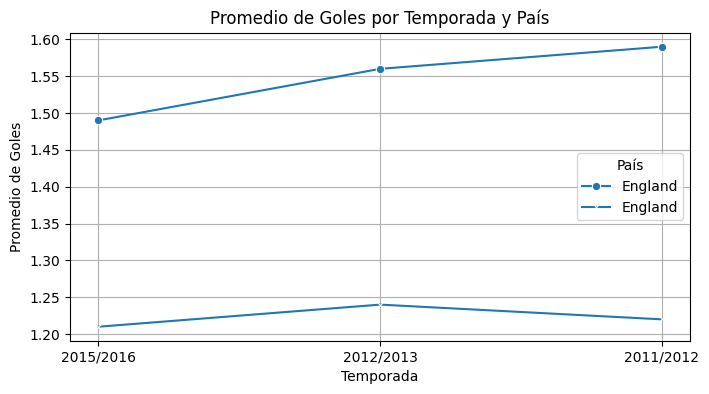

In [ ]:
# Crear la gráfica
plt.figure(figsize=(8, 4))
sns.lineplot(data=goals_by_season, x='season', y='avg_local_goals', hue='Country', marker='o')
sns.lineplot(data=goals_by_season, x='season', y='avg_visitor_goals', hue='Country', marker='x')

plt.title('Promedio de Goles por Temporada y País')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Goles')
plt.legend(title='País')
plt.grid(True)
plt.show()